# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1


    # Run an API request for each of the cities
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pisco
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | acarau
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | yinchuan
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | pacific grove
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | san antonio de pale
Processing Record 11 of Set 1 | taro
Processing Record 12 of Set 1 | bayji
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 17 of Set 1 | chernyshevskiy
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | yuzhno-kurilsk
Processing Record 20 of Set 1 | fort bragg
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pisco,-13.7000,-76.2167,21.03,83,20,4.12,PE,1715096755
1,adamstown,-25.0660,-130.1015,21.62,78,72,5.30,PN,1715097003
2,acarau,-2.8856,-40.1200,30.85,66,84,5.42,BR,1715097004
3,isafjordur,66.0755,-23.1240,6.02,61,75,0.00,IS,1715097004
4,yinchuan,38.4681,106.2731,21.39,12,97,1.56,CN,1715097004


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,21.03,83,20,4.12,PE,1715096755
1,adamstown,-25.0660,-130.1015,21.62,78,72,5.30,PN,1715097003
2,acarau,-2.8856,-40.1200,30.85,66,84,5.42,BR,1715097004
3,isafjordur,66.0755,-23.1240,6.02,61,75,0.00,IS,1715097004
4,yinchuan,38.4681,106.2731,21.39,12,97,1.56,CN,1715097004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

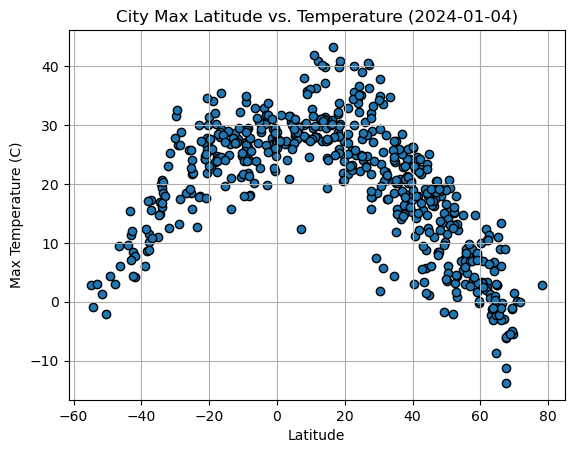

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

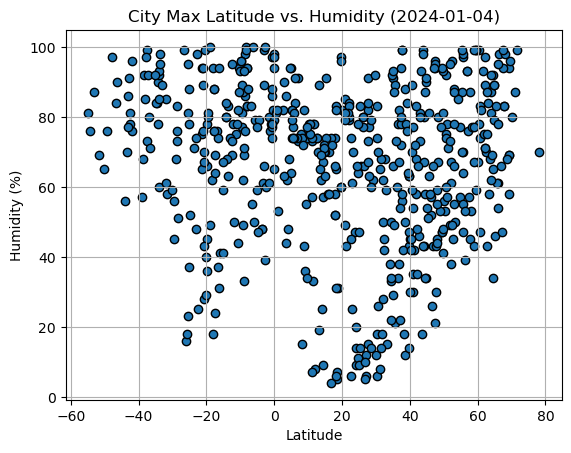

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

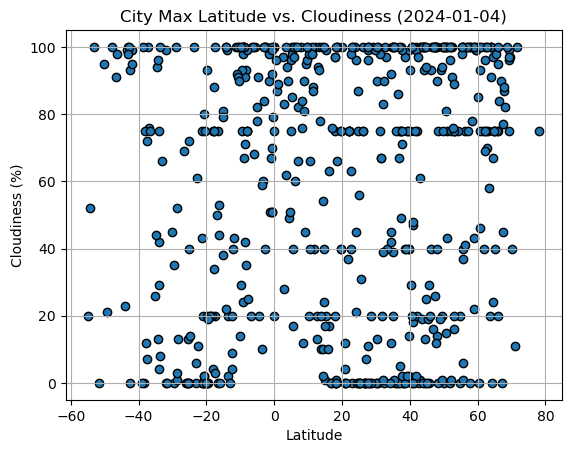

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

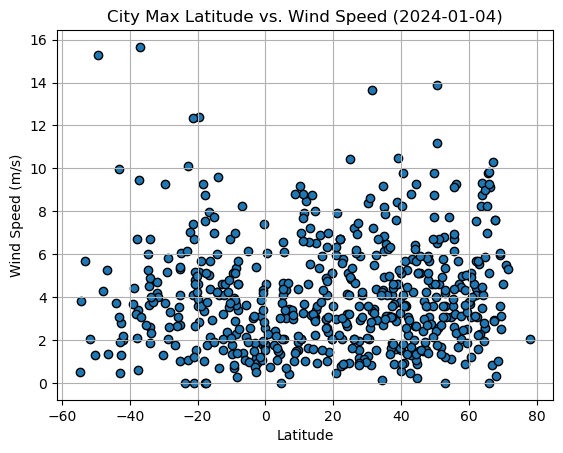

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

plt.scatter(x_values, y_values,edgecolor="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-01-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, text_position):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-value is : {rvalue}")
    

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_position,fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,isafjordur,66.0755,-23.1240,6.02,61,75,0.00,IS,1715097004
4,yinchuan,38.4681,106.2731,21.39,12,97,1.56,CN,1715097004
5,bethel,41.3712,-73.4140,24.54,42,0,3.60,US,1715096809
7,pacific grove,36.6177,-121.9166,13.99,78,0,3.13,US,1715097004
11,bayji,34.9311,43.4870,23.79,29,39,4.95,IQ,1715097005


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pisco,-13.7000,-76.2167,21.03,83,20,4.12,PE,1715096755
1,adamstown,-25.0660,-130.1015,21.62,78,72,5.30,PN,1715097003
2,acarau,-2.8856,-40.1200,30.85,66,84,5.42,BR,1715097004
6,grytviken,-54.2811,-36.5092,-0.94,76,52,3.80,GS,1715097004
8,ta`u,-14.2336,-169.5144,28.88,80,100,4.23,AS,1715097004


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8396999739047546


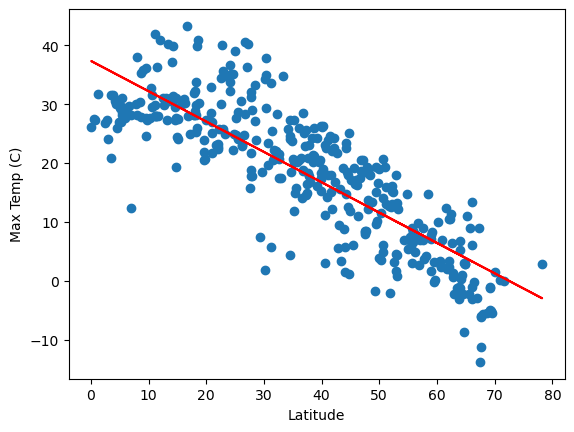

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (5, -40))

The r-value is : 0.7784388138515422


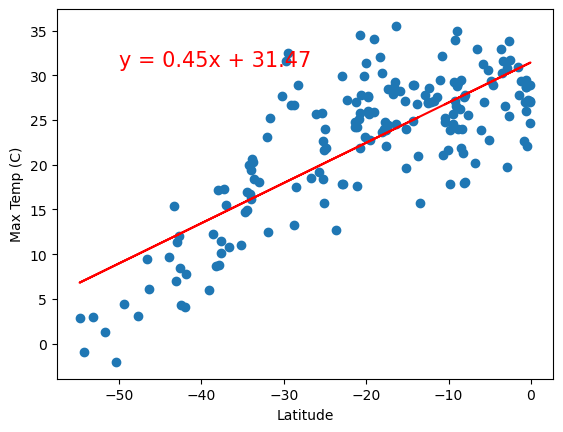

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", (-50, 31))

**Discussion about the linear relationship:** There is a negative correlation between max temp and latitude in the northern hemisphere. As well as a moderate positive correlation between max temp anf latitude in the southern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.17084862589142302


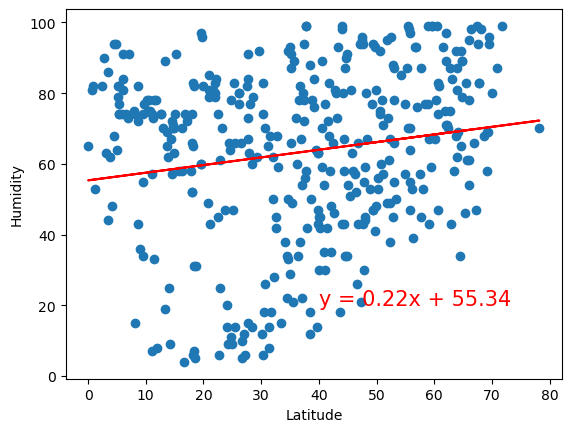

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (40, 20))

The r-value is : -0.027636559733442277


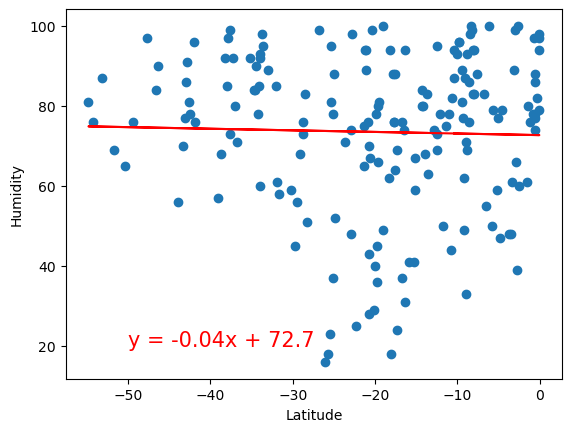

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]


plot_linear_regression(x_values, y_values, "Latitude", "Humidity", (-50, 20))

**Discussion about the linear relationship:** there is a weak positive correlation between humidity and latitude in the northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.08134312051097867


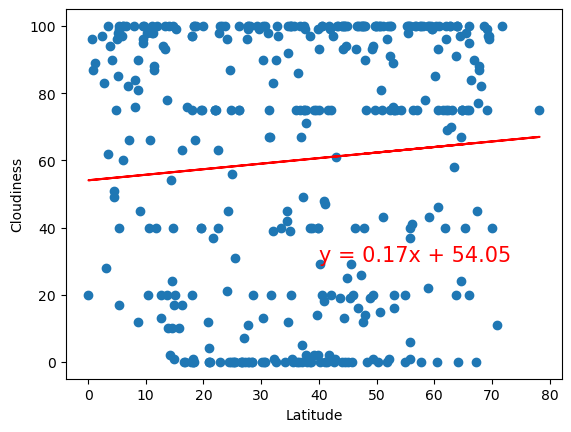

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (40, 30))

The r-value is : 0.18047462304189016


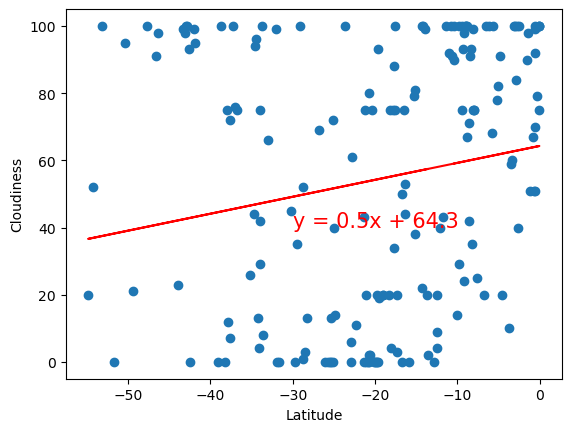

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", (-30, 40))

**Discussion about the linear relationship:** There is a pretty weak correlation between cloudiness and latitude in the northern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.11992341161281421


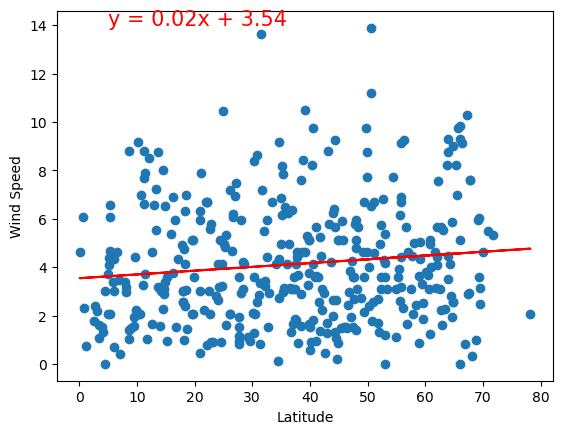

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (5, 14))

The r-value is : -0.15081792657409646


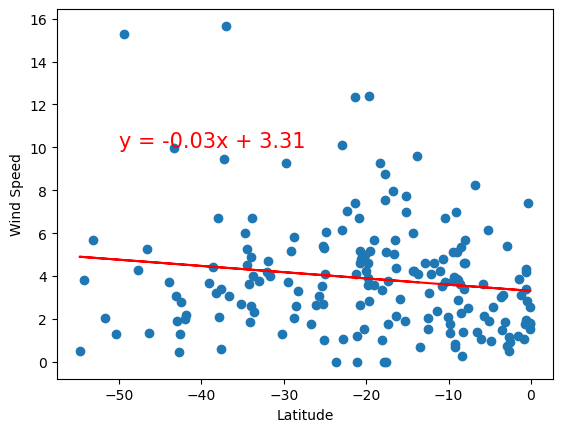

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]


plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed", (-50, 10))

**Discussion about the linear relationship:** There is a weak positive correlation between wind speed and latitude in the northern hemisphere.